<a href="https://colab.research.google.com/github/Pusp203/AI-ML-DL-CV-NLP-Projects/blob/main/CIFAR_10_Object_Recognition_using_ResNet50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [35]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [36]:
# daatset api
!kaggle competitions download -c cifar-10

In [37]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [38]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [39]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [40]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 37.1 MB/s eta 0:00:00


In [41]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [42]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies


In [43]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [44]:
filenames=os.listdir('/content/train')


In [45]:
type(filenames)

list

In [46]:
len(filenames)

50000

In [47]:
print(filenames[0:5])

['47877.png', '25027.png', '42647.png', '48396.png', '24153.png']


In [48]:
print(filenames[-5:])


['47009.png', '8642.png', '41454.png', '10326.png', '21617.png']


Labels Processing


In [49]:
labels_df=pd.read_csv("/content/trainLabels.csv")

In [50]:
labels_df.shape

(50000, 2)

In [51]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [52]:
labels_df[labels_df['id']==18730]

,id,label
18729,18730,dog


In [53]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [54]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [55]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [56]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [57]:
labels_dictinary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels=[labels_dictinary[i] for i in labels_df['label']]

In [58]:
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [59]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


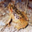

In [60]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/7796.png')
cv2_imshow(img)

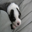

In [61]:
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [62]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [63]:
id_list=list(labels_df['id'])

Image processing

In [64]:
#convert images to numpy arrays
train_data_folder='/content/train/'
data=[]
for id in id_list:
  # img_path=Image.open(train_data_folder + str(id)+'.png')
  # print(img_path)

  # if id>=5:
  #   break
  image=Image.open(train_data_folder + str(id) + '.png')
  image=np.array(image)
  data.append(image)

In [65]:
type(data)

list

In [66]:
len(data)

50000

In [67]:
type(data[0])

numpy.ndarray

In [68]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
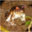

In [69]:
data[0]

In [70]:
#convert images list and label list to numpy arrays
X=np.array(data)
Y=np.array(labels)

In [71]:
type(X)

numpy.ndarray

In [72]:
print(X.shape) #50k numpy arrays or 50k images of shape 32*32 with 3 color channels
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test SPlit

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [74]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [75]:
#Scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [76]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
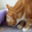

In [77]:
X_train[0]

Building the Neural Network

In [78]:
import tensorflow as tf
from tensorflow import keras

In [79]:
num_of_classes=10

#setting up the layers of Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [81]:
#trainining the neural network
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.2013 - loss: 2.1383 - val_acc: 0.2555 - val_loss: 1.9448
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2714 - loss: 1.9532 - val_acc: 0.2695 - val_loss: 1.9125
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2852 - loss: 1.9313 - val_acc: 0.2995 - val_loss: 1.8973
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2922 - loss: 1.9233 - val_acc: 0.3072 - val_loss: 1.9043
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.2971 - loss: 1.9091 - val_acc: 0.2828 - val_loss: 1.9089
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.3074 - loss: 1.8892 - val_acc: 0.3043 - val_loss: 1.8611
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3198 - loss: 1.8518 - val_acc: 0.3285 - val_loss: 1.8075
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.3264 - loss: 1.8367 - val_acc: 0.3060 - val_loss: 1.8802
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━

ResNet50

In [86]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import  Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [87]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [88]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [91]:
num_of_classes
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [94]:
model.compile(optimizer=optimizers.RMSprop( learning_rate=2e-5,),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [95]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 447s 339ms/step - acc: 0.3277 - loss: 2.0351 - val_acc: 0.7535 - val_loss: 0.8832
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 406s 341ms/step - acc: 0.6656 - loss: 1.0963 - val_acc: 0.8852 - val_loss: 0.4803
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 341ms/step - acc: 0.7874 - loss: 0.7837 - val_acc: 0.9175 - val_loss: 0.3503
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 341ms/step - acc: 0.8582 - loss: 0.5956 - val_acc: 0.9305 - val_loss: 0.2920
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 342ms/step - acc: 0.9027 - loss: 0.4609 - val_acc: 0.9408 - val_loss: 0.2450
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 375s 333ms/step - acc: 0.9324 - loss: 0.3620 - val_acc: 0.9365 - val_loss: 0.2353
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 390s 340ms/step - acc: 0.9505 - loss: 0.2912 - val_acc: 0.9427 - val_loss: 0.2197
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 341ms/step - acc: 0.9638 - loss: 0.2380 - val_acc: 0.9398 - val_loss: 0.2205
Epoch 9/

In [96]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test accuracy=',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - acc: 0.9342 - loss: 0.2427
Test accuracy= 0.9369999766349792


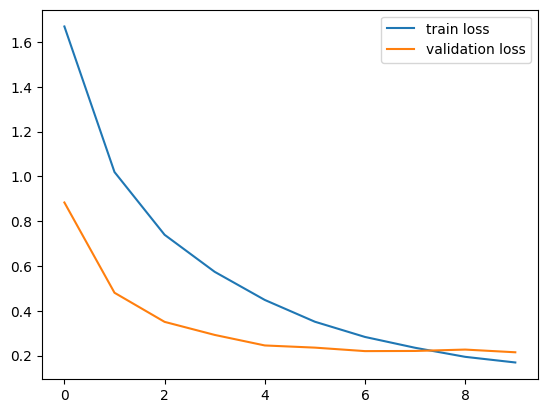

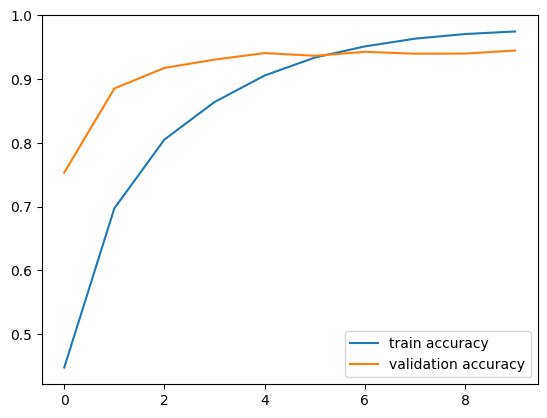

In [97]:
h=history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()